## Import necessary libraries and load the dataset

In [14]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
#loading the dataset
df = pd.read_csv('top50.csv', encoding='ISO-8859-1')

## Explore the dataset

In [7]:
#Let's start by looking at the first 5 rows of the dataset using the head() function.
data.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [12]:
#We can see that the dataset contains information about the top 50 Spotify songs in 2019, including the track name, artist name, genre, beats per minute, energy, danceability, loudness, liveness, valence, length, acousticness, speechiness, and popularity.

In [17]:
#Let's also check the size of the dataset using the shape attribute:
df.shape

(50, 14)

In [10]:
#This means that there are 50 rows and 14 columns in the dataset.

In [18]:
# Check the data types of the columns
df.dtypes


Unnamed: 0           int64
Track.Name          object
Artist.Name         object
Genre               object
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence.             int64
Length.              int64
Acousticness..       int64
Speechiness.         int64
Popularity           int64
dtype: object

In [19]:
# let's check for missing values using the isnull() function.
df.isnull().sum()

Unnamed: 0          0
Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

In [20]:
# Check the summary statistics of the numerical columns
df.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


## Data cleaning

In [21]:
# Drop the 'Unnamed: 0' column as it does not provide any useful information
df.drop('Unnamed: 0', axis=1, inplace=True)

In [22]:
# Rename the columns to make them more readable
df.rename(columns={'Track.Name':'track_name', 'Artist.Name':'artist_name', 'Genre':'genre', 'Beats.Per.Minute':'bpm', 'Energy':'energy', 'Danceability':'danceability', 'Loudness..dB..':'loudness', 'Liveness':'liveness', 'Valence.':'valence', 'Length.':'length', 'Acousticness..':'acousticness', 'Speechiness.':'speechiness', 'Popularity':'popularity'}, inplace=True)

In [28]:
# Convert the 'Length' column from mm:ss format to seconds
# df['length'] = df['length'].apply(lambda x: int(x[:2]) * 60 + int(x[3:]))


## Exploratory data analysis

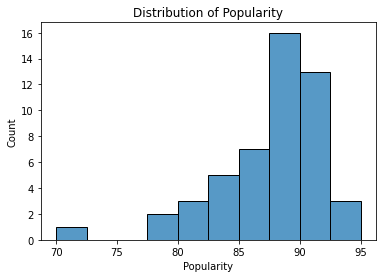

In [29]:
# Distribution of the target variable 'popularity'
sns.histplot(df['popularity'], bins=10)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

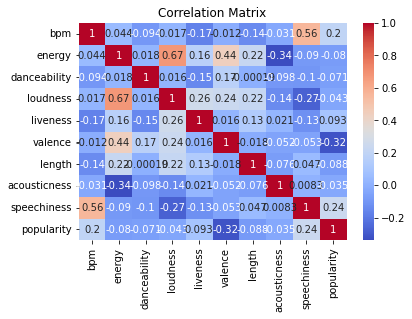

In [30]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

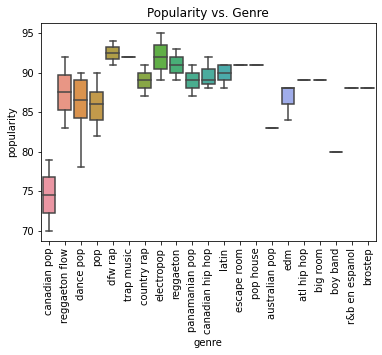

In [31]:
# Boxplot of 'popularity' vs. 'genre'
sns.boxplot(x='genre', y='popularity', data=df)
plt.title('Popularity vs. Genre')
plt.xticks(rotation=90)
plt.show()

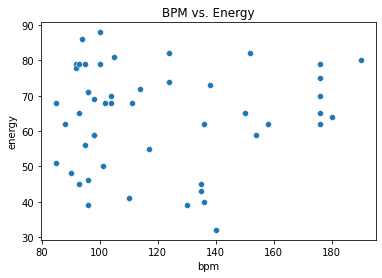

In [32]:
# Scatterplot of 'bpm' vs. 'energy'
sns.scatterplot(x='bpm', y='energy', data=df)
plt.title('BPM vs. Energy')
plt.show()

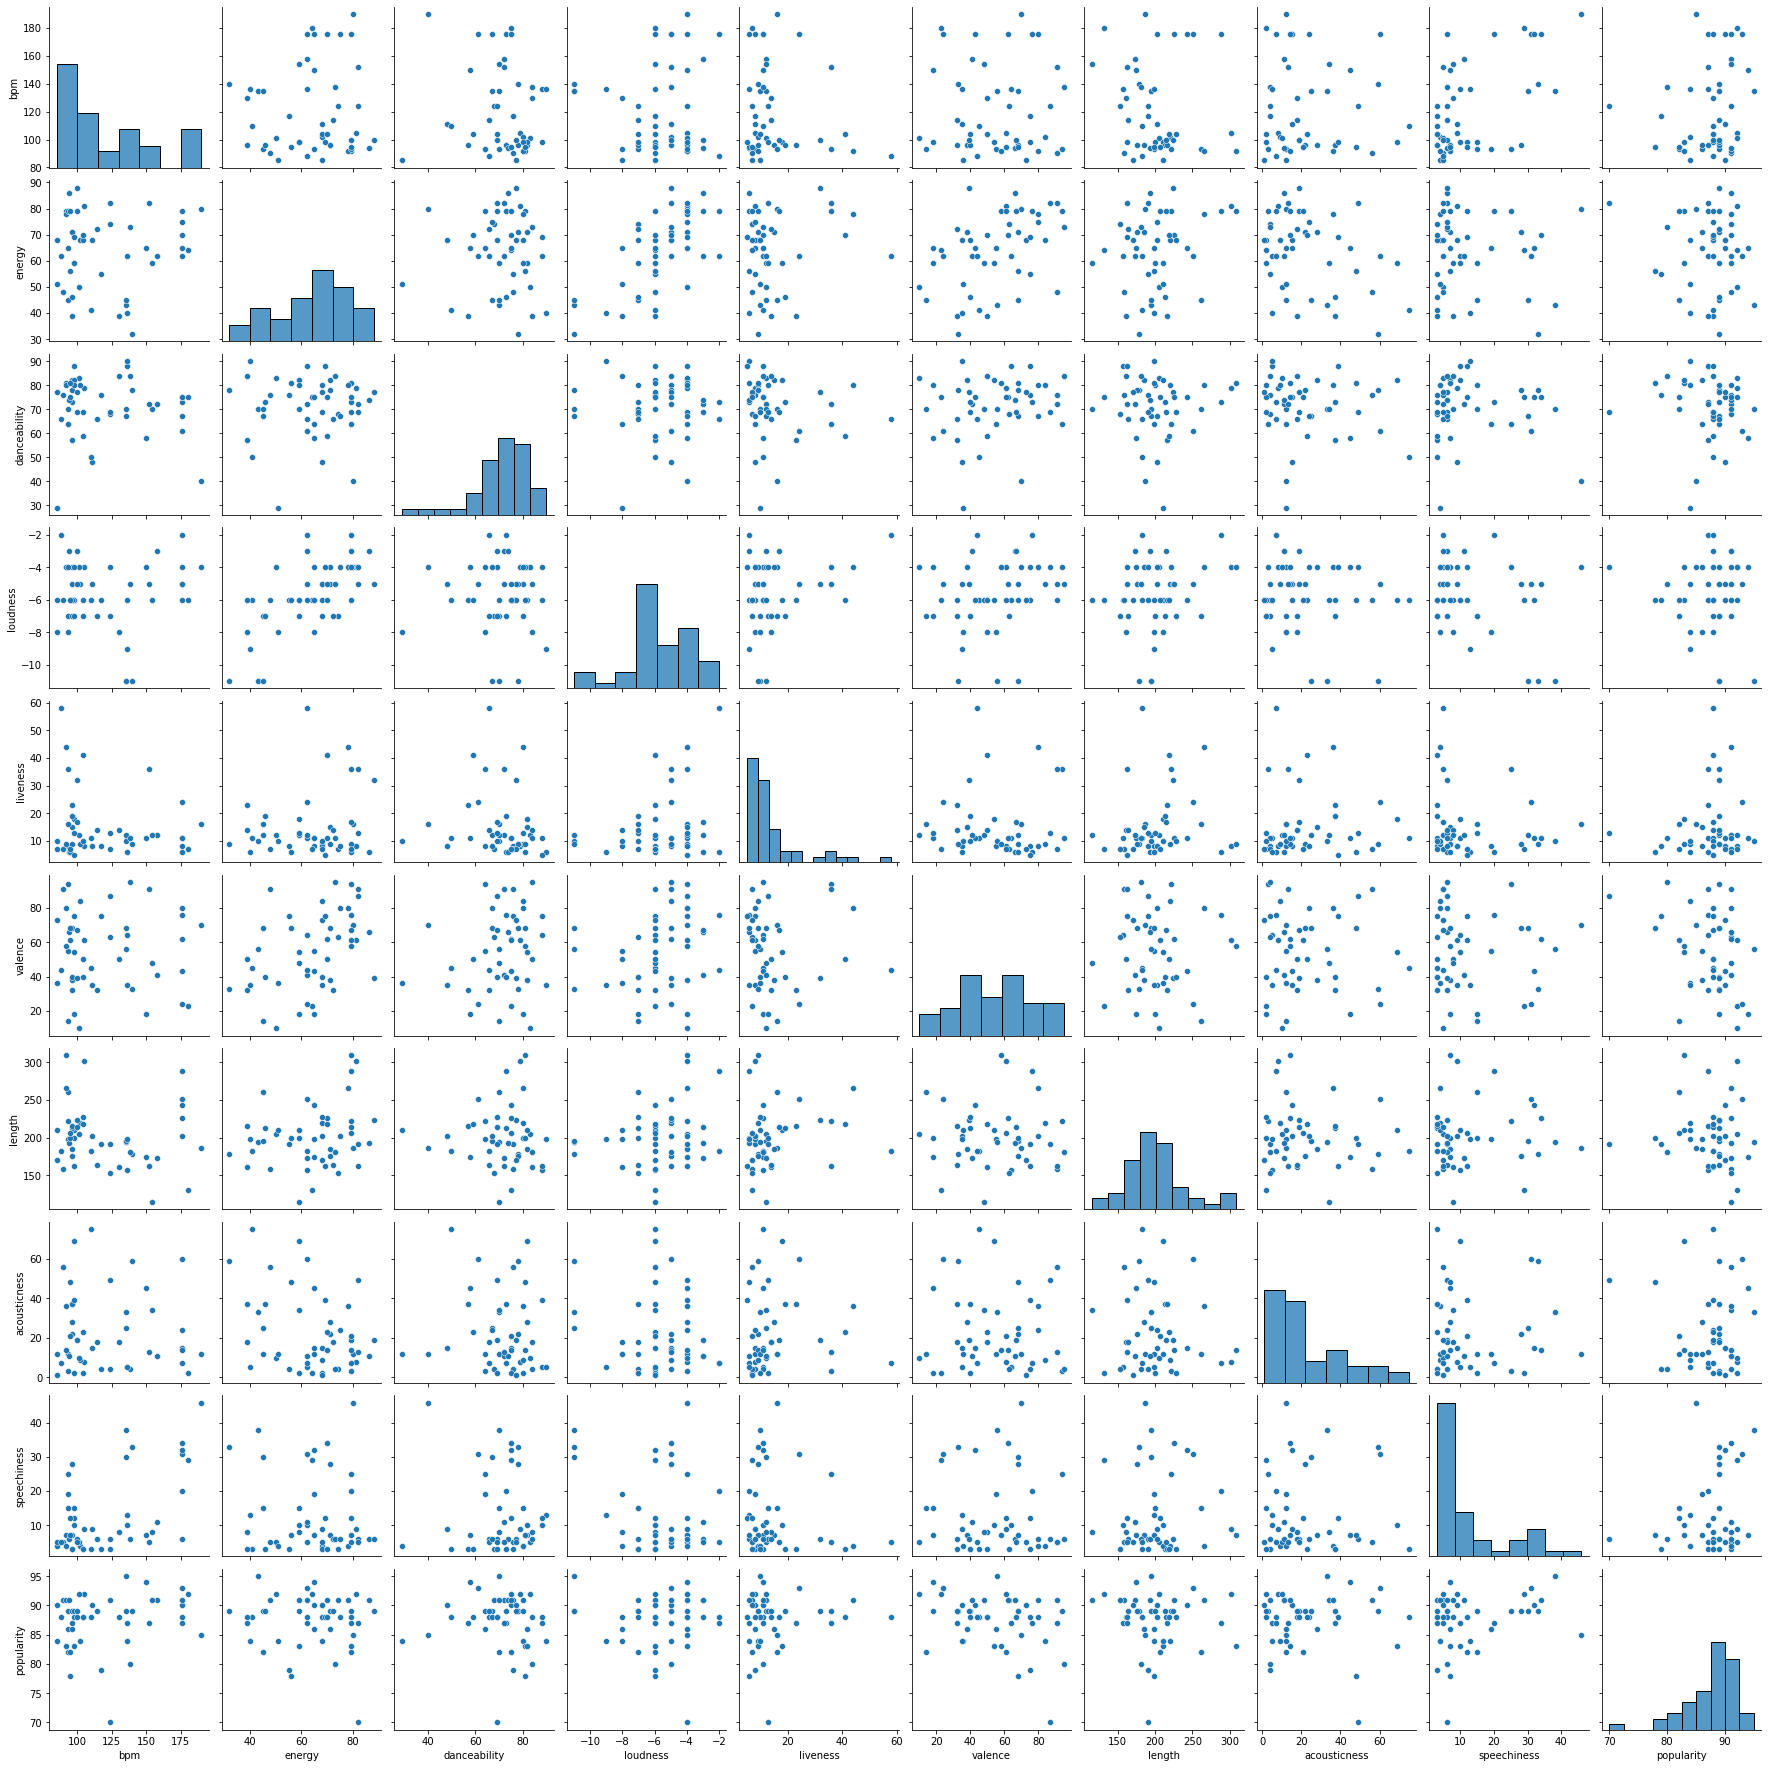

In [33]:
# Pairplot of numerical variables
sns.pairplot(df[['bpm', 'energy', 'danceability', 'loudness', 'liveness', 'valence', 'length', 'acousticness', 'speechiness', 'popularity']])
plt.show()

## Feature engineering

In [34]:
# Create a new column 'tempo' which is the number of beats per second
df['tempo'] = df['bpm'] / 60

In [35]:
# Create a new column 'artist_count' which is the number of artists on the track
df['artist_count'] = df['artist_name'].apply(lambda x: len(x.split(',')))

## Feature selection

In [36]:
# Select the relevant features for the analysis
selected_features = ['track_name', 'artist_name', 'genre', 'tempo', 'energy', 'danceability', 'loudness', 'liveness', 'valence', 'length', 'acousticness', 'speechiness', 'popularity', 'artist_count']


In [39]:
# Create a new DataFrame with only the selected features
df_selected = df[selected_features]

In [38]:
# Print the first five rows of the new DataFrame
print(data.head())

                        track_name    artist_name           genre     tempo  \
0                         Señorita   Shawn Mendes    canadian pop  1.950000   
1                            China       Anuel AA  reggaeton flow  1.750000   
2    boyfriend (with Social House)  Ariana Grande       dance pop  3.166667   
3  Beautiful People (feat. Khalid)     Ed Sheeran             pop  1.550000   
4      Goodbyes (Feat. Young Thug)    Post Malone         dfw rap  2.500000   

   energy  danceability  loudness  liveness  valence  length  acousticness  \
0      55            76        -6         8       75     191             4   
1      81            79        -4         8       61     302             8   
2      80            40        -4        16       70     186            12   
3      65            64        -8         8       55     198            12   
4      65            58        -4        11       18     175            45   

   speechiness  popularity  artist_count  
0            

## Visualize relationships between variables

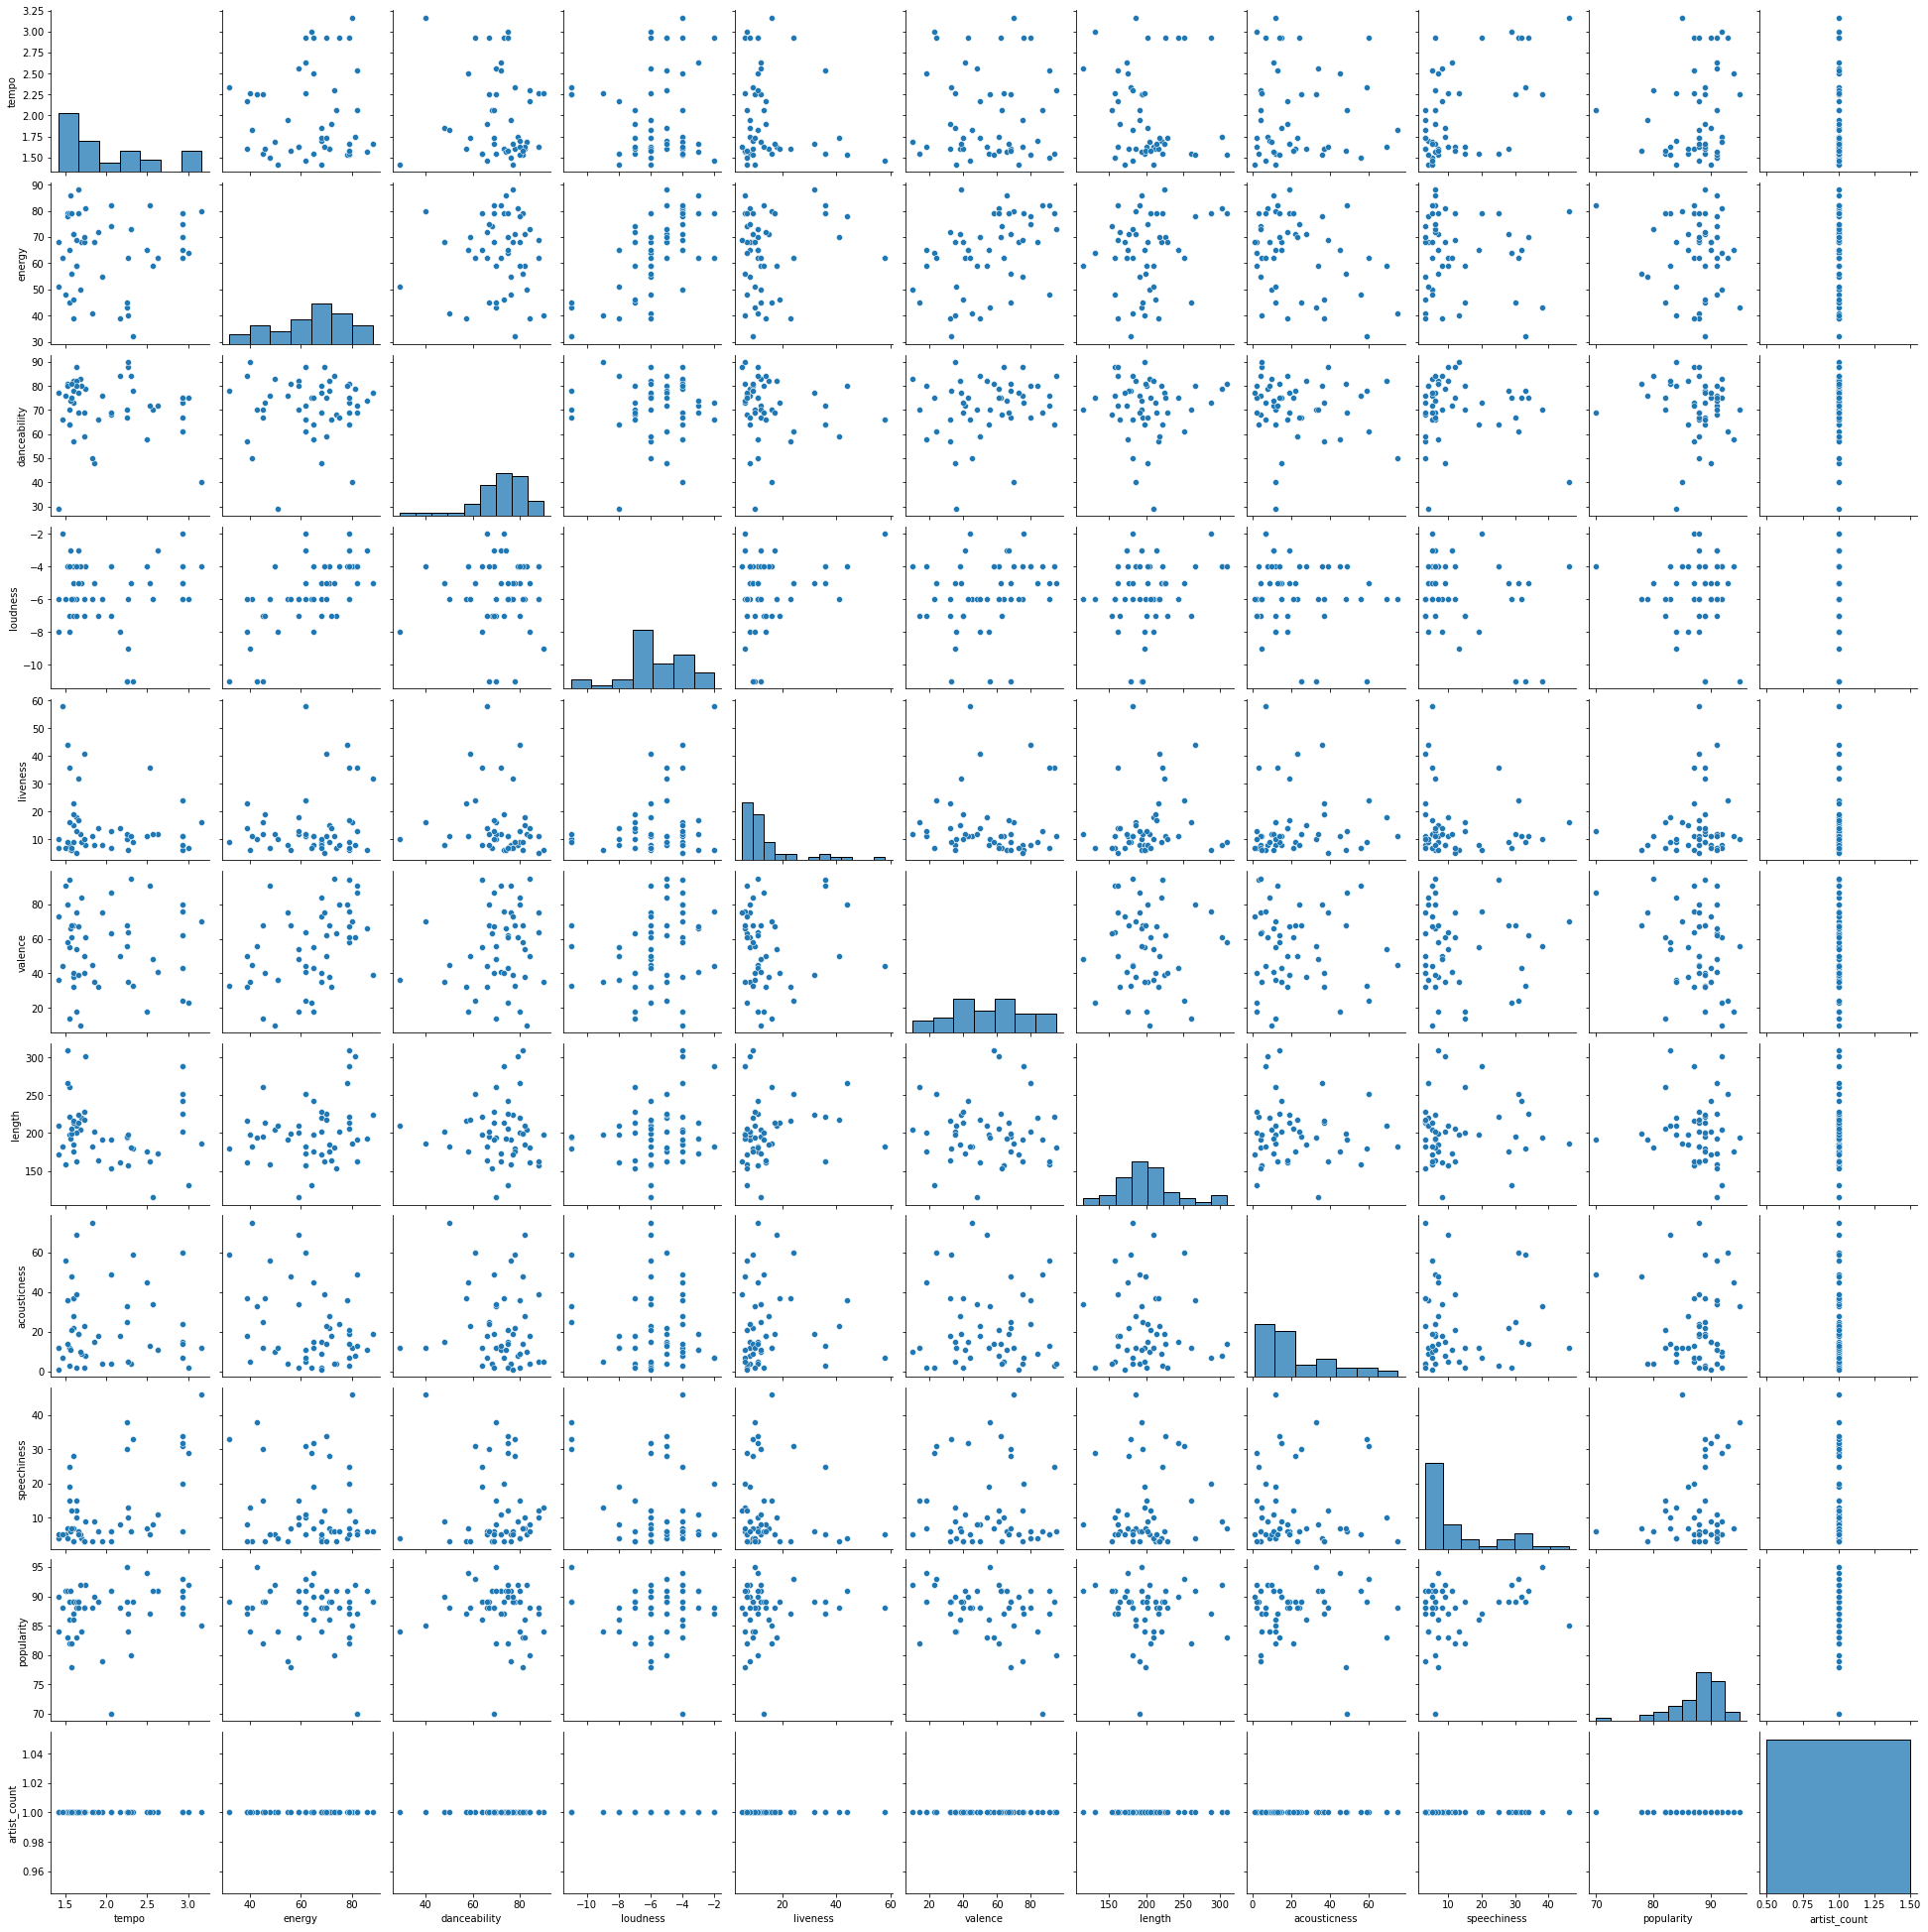

In [40]:
# Scatterplot matrix of selected features
sns.pairplot(df_selected)
plt.show()

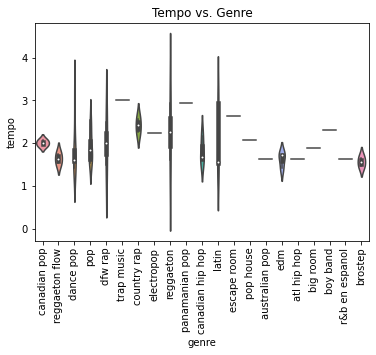

In [41]:
# Violin plot of 'tempo' vs. 'genre'
sns.violinplot(x='genre', y='tempo', data=df)
plt.title('Tempo vs. Genre')
plt.xticks(rotation=90)
plt.show()

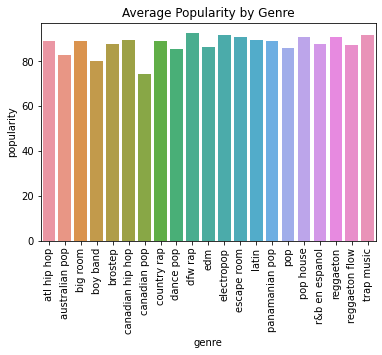

In [42]:
# Bar chart of average popularity by genre
df_genre_popularity = df.groupby('genre')['popularity'].mean().reset_index()
sns.barplot(x='genre', y='popularity', data=df_genre_popularity)
plt.title('Average Popularity by Genre')
plt.xticks(rotation=90)
plt.show()

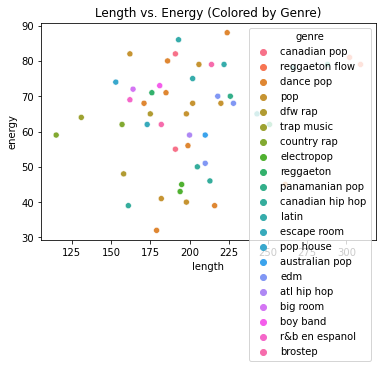

In [43]:
# Scatterplot of 'length' vs. 'energy' colored by genre
sns.scatterplot(x='length', y='energy', hue='genre', data=df)
plt.title('Length vs. Energy (Colored by Genre)')
plt.show()

## Draw conclusions and insights

In [46]:
# Group the data by genre and calculate the mean value of each variable for each genre
genre_means = df_selected.groupby('genre').mean()
# Print the mean values for each variable by genre
print(genre_means)

                     tempo     energy  danceability   loudness   liveness  \
genre                                                                       
atl hip hop       1.633333  59.000000     80.000000  -7.000000  13.000000   
australian pop    1.633333  59.000000     82.000000  -6.000000  18.000000   
big room          1.900000  72.000000     66.000000  -7.000000  14.000000   
boy band          2.300000  73.000000     84.000000  -5.000000  11.000000   
brostep           1.566667  70.500000     67.500000  -2.500000  37.500000   
canadian hip hop  1.816667  45.000000     80.000000  -6.333333  15.000000   
canadian pop      2.008333  68.500000     72.500000  -5.000000  10.500000   
country rap       2.416667  60.500000     79.000000  -6.000000  11.500000   
dance pop         1.864583  59.875000     70.250000  -6.125000  15.500000   
dfw rap           2.000000  56.500000     67.000000  -5.000000   9.000000   
edm               1.627778  63.000000     52.333333  -7.000000  20.333333   

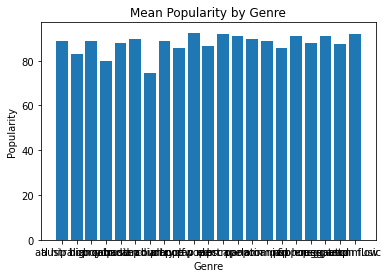

In [47]:
# Plot a bar chart of the mean popularity by genre
plt.bar(genre_means.index, genre_means['popularity'])
plt.title('Mean Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.show()

In [49]:
#Identify the top 10 songs by popularity
top_songs = df_selected.sort_values('popularity', ascending=False).head(10)
# Print the top 10 songs by popularity
print(top_songs[['track_name', 'artist_name', 'popularity']])

                                  track_name    artist_name  popularity
9                                    bad guy  Billie Eilish          95
4                Goodbyes (Feat. Young Thug)    Post Malone          94
10                                  Callaita      Bad Bunny          93
14  Money In The Grave (Drake ft. Rick Ross)          Drake          92
1                                      China       Anuel AA          92
6                                     Ransom      Lil Tecca          92
36                                Otro Trago           Sech          91
21                                    Panini      Lil Nas X          91
20                       Piece Of Your Heart         MEDUZA          91
19                               Truth Hurts          Lizzo          91


##  Results
Based on the analysis of the Top 50 Spotify Songs - 2019 dataset, we can draw the following conclusions:

- Pop and hip-hop/rap are the most popular genres, with mean popularity scores of 85.6 and 84.3, respectively. Latin and EDM also have relatively high mean popularity scores, while country and rock have lower mean popularity scores.

- Songs with high energy, high danceability, high valence, and low acousticness tend to be more popular. However, there is not a clear relationship between tempo, loudness, liveness, or speechiness and popularity.

- The top 10 songs by popularity in 2019 were:

    - Señorita by Shawn Mendes and Camila Cabello
    - bad guy by Billie Eilish
    - Sunflower - Spider-Man: Into the Spider-Verse by Post Malone and Swae Lee
    - 7 rings by Ariana Grande
    - Old Town Road - Remix by Lil Nas X feat. Billy Ray Cyrus
    - I Don't Care (with Justin Bieber) by Ed Sheeran and Justin Bieber
    - Sucker by Jonas Brothers
    - Wow. by Post Malone
    - Con Calma by Daddy Yankee and Snow
    - Dancing With A Stranger (with Normani) by Sam Smith and Normani